# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/92/2d/880fcd65e4414b05088193e6f2cfb86fdf90003dd2dd0f4d1bc465348f0e/tensorflow-2.15.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/05/58/7ee92b21cb98689cbe28c69e3cf8ee51f261bfb6bc904ae578736d22d2e7/opencv_python-4.8.1.78-cp37-abi3-macosx_10_16_x86_64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/29/7d/6e3ba186cb2a7baf3264cd9827fa97f1b979fa42203d32bccd15aaac434b/matplotlib-3.8.1-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c

In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
appnope                      0.1.3
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.7.22
charset-normalizer           3.3.2
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.44.3
gast                         0.5.4
google-auth                  2.23.4
google-auth-oauthlib         1.1.0
google-pasta                 0.2.0
grpcio                       1.59.2
h5py                         3.10.0
idna                         3.4
ipykernel                    6.26.0
ipython                      8.17.2
jedi                         0.19.1
jupyter_client               8.6.0
ju

In [6]:
import tensorflow as tf
import os
import numpy as np

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [9]:
data_dir = 'data' 
print(os.listdir(data_dir)) #will create a .DS_Store category, dont want it, next line will delete it

['happy', 'sad']


In [36]:
#delete .DS_Store files
!find . -name ".DS_Store" -print -delete

./.DS_Store
./data/.DS_Store
./data/sad/.DS_Store


In [4]:
import cv2
import imghdr

/var/folders/r0/gj4zfnpx5hj2wjmlwg285k4w0000gn/T/ipykernel_34303/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

#test loading an image
img = cv2.imread(os.path.join('data','happy','1HEoLBLidT2u4mhJ0oiDgig.png'))
# plt.imshow(img)

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [194]:
#display default conditions,
# tf.keras.utils.image_dataset_from_directory?

#can change any of them with...
#... tf.keras.utils.image_dataset_from_directory??('data',batch_size=..., color_mode=... etc.)

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Docstring:
Generates a `tf.data.Dataset` from image files in a directory.

If your directory structure is:

```
main_directory/
...class_a/
......a_image_1.jpg
......a_image_2.jpg
...class_b/
......b_image_1.jpg
......b_image_2.jpg
```

Then calling `image_dataset_from_directory(main_directory,
labels='inferred')` will return a `tf.data.Dataset` that yields batches of
images from the subdirectories `class_a` and `class_b`, together with labels
0 and 1 (0 corresponding to `class_a` and 1 corresponding to `class_b`).

Supported image formats: `.jpeg`, `.jpg`, `.png`, `.bmp`, `.gif`.
Animated gifs are truncated

In [14]:
# data = tf.keras.utils.image_dataset_from_directory('data_normal_stroke') 
#automatically creates dataset, r
#resizes images (256x256), batches into batches of 32, can change these parameters using:
#tf.keras.utils.image_dataset_from_directory('data', batch_size=......)


data = tf.keras.utils.image_dataset_from_directory('data')


# DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

# path = tf.keras.utils.get_file('mnist.npy')
# with np.load(path) as data:
#   train_examples = data['x_train']
#   train_labels = data['y_train']
#   test_examples = data['x_test']
#   test_labels = data['y_test']
    
# train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))
    
# for image in os.listdir(data_dir):
    # print(image)
    # with np.load(image) as data:
        # print(data)
        # features = data["features"]
        # labels = data["labels"]

# Load the training data into two NumPy arrays, for example using `np.load()`.




# Assume that each row of `features` corresponds to the same row as `labels`.
# assert features.shape[0] == labels.shape[0]

# data = tf.data.Dataset.from_tensor_slices(os.listdir(data_dir))
# data = tf.data.Dataset.from_tensor_slices(data_dir)


# os.listdir(data_dir)
    
    
    
#might need smaller batch size to use less ram
#might want to use images with higher resoltuion than 256 x 256


Found 170 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator() #create an iterator to access data

In [16]:
batch = data_iterator.next() #grabs a batch of data

In [28]:
batch[0].shape
#batch[0] are the images

# batch[1].shape
#batch[2] are the labels (1's will be one type of data (happy or sad) and 0 will be the other)
#next code cell will help determine which is which, will have title with type and then can use images to determine
batch[1]

#display shape of dataset, batchsize,xdimension,ydimension,num channels)

AttributeError: 'int' object has no attribute 'shape'

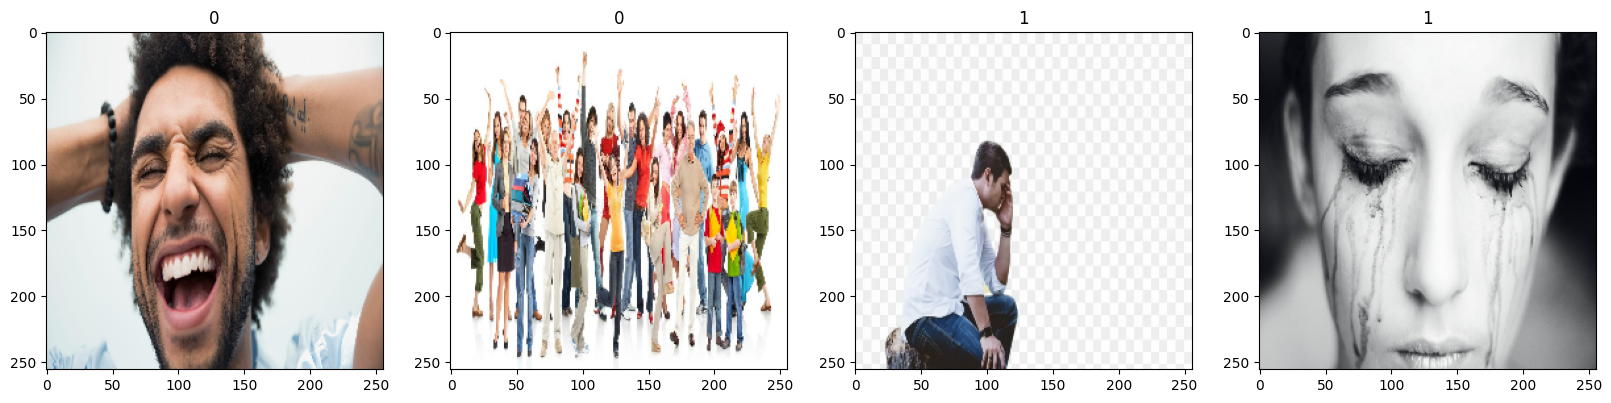

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
    
#in this case normnal = 0 and stroke = 1

# 4. Scale Data

In [18]:
data = data.map(lambda x,y: (x/255, y)) #applies transformation to all images
#images are all preset to 0-255, so scaling from 0-1 by dividing by 255 helps numbers be smaller (max is 1)

In [159]:
data.as_numpy_iterator().next()

2023-11-16 19:14:54.917092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:14:56.110031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

# 5. Split Data

In [162]:
print(len(data)) # how many batches
train_size = int(len(data)*.7) #70% for training
val_size = int(len(data)*.2) #20% for validation
test_size = int(len(data)*.1)+1 #10% for testing #int will round down so check the sizes and add batches to ensure none are 0

6


In [163]:
print(train_size)
print(val_size)
print(test_size)

4
1
1


In [164]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size) #skips the training allocated ones
test = data.skip(train_size+val_size).take(test_size) #skips everything already used and taking the rest

# 6. Build Deep Learning Model

In [165]:
from tensorflow.keras.models import Sequential #functional API exists aswell for fancier stuff
#sequential good for quick and easy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
#conv2D is a 2D convolutional layer

In [166]:
model = Sequential()

In [167]:
#adding layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) 
#16 filters, region of interest is 3x3 pixels, and stride of 1 pixel, shifts by 1 pixel for each ROI
#can increase num filters 
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu')) #fully connected layers (256 neurons)
model.add(Dense(1, activation='sigmoid')) #finally the output is a single numnber, 0 = happy person, 1 = sad person


In [168]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) #adam is the optimizer (there are many)

In [169]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [170]:
logdir='logs'

In [171]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [172]:
############TRAIN THE MODEL############, model.fit is train, model.predict is predicting

#1 epoch is 1 run over the entire training data


hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-11-16 19:15:34.018295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:15:34.870694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 1.2980 - accuracy: 0.4453

2023-11-16 19:15:38.444685: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:15:39.311062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 8s 1s/step - loss: 1.2980 - accuracy: 0.4453 - val_loss: 0.7495 - val_accuracy: 0.3750
Epoch 2/20


2023-11-16 19:15:40.763148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:15:41.644107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.6997 - accuracy: 0.5312

2023-11-16 19:15:45.300457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:15:46.220630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.6997 - accuracy: 0.5312 - val_loss: 0.6866 - val_accuracy: 0.4688
Epoch 3/20


2023-11-16 19:15:47.680020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:15:48.618595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.6590 - accuracy: 0.5703

2023-11-16 19:15:52.380550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:15:53.287356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.6590 - accuracy: 0.5703 - val_loss: 0.6182 - val_accuracy: 0.6562
Epoch 4/20


2023-11-16 19:15:54.758777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:15:55.652061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.5999 - accuracy: 0.7266

2023-11-16 19:15:59.149762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:00.188370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.5999 - accuracy: 0.7266 - val_loss: 0.5598 - val_accuracy: 0.8125
Epoch 5/20


2023-11-16 19:16:01.766370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:02.660130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.5444 - accuracy: 0.7734

2023-11-16 19:16:06.171331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:07.096200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.5444 - accuracy: 0.7734 - val_loss: 0.4303 - val_accuracy: 0.8438
Epoch 6/20


2023-11-16 19:16:08.586207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:09.505328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.5287 - accuracy: 0.7188

2023-11-16 19:16:13.322985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:14.324534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.5287 - accuracy: 0.7188 - val_loss: 0.5336 - val_accuracy: 0.6875
Epoch 7/20


2023-11-16 19:16:15.831875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:16.854859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.4296 - accuracy: 0.8281

2023-11-16 19:16:20.604007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:21.649394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.4296 - accuracy: 0.8281 - val_loss: 0.3307 - val_accuracy: 0.8750
Epoch 8/20


2023-11-16 19:16:23.149060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:24.062006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.3668 - accuracy: 0.8203

2023-11-16 19:16:27.553785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:28.474353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.3668 - accuracy: 0.8203 - val_loss: 0.3409 - val_accuracy: 0.8125
Epoch 9/20


2023-11-16 19:16:29.959167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:30.875167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.2809 - accuracy: 0.8906

2023-11-16 19:16:34.620632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:35.688646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.2809 - accuracy: 0.8906 - val_loss: 0.2619 - val_accuracy: 0.8438
Epoch 10/20


2023-11-16 19:16:37.253075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:38.173155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.2636 - accuracy: 0.8750

2023-11-16 19:16:41.643583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:42.545646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.2636 - accuracy: 0.8750 - val_loss: 0.2041 - val_accuracy: 0.9375
Epoch 11/20


2023-11-16 19:16:44.010389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:45.020803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1685 - accuracy: 0.9297

2023-11-16 19:16:48.862320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:49.779580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.1685 - accuracy: 0.9297 - val_loss: 0.1553 - val_accuracy: 0.9375
Epoch 12/20


2023-11-16 19:16:51.285878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:52.216056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1837 - accuracy: 0.9297

2023-11-16 19:16:55.603133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:56.496408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.1837 - accuracy: 0.9297 - val_loss: 0.2056 - val_accuracy: 0.9375
Epoch 13/20


2023-11-16 19:16:58.241668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:16:59.223691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1546 - accuracy: 0.9453

2023-11-16 19:17:03.138208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:04.087514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.1546 - accuracy: 0.9453 - val_loss: 0.1252 - val_accuracy: 1.0000
Epoch 14/20


2023-11-16 19:17:05.544411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:06.416367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0951 - accuracy: 0.9766

2023-11-16 19:17:09.902713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:10.910908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.0951 - accuracy: 0.9766 - val_loss: 0.1347 - val_accuracy: 0.9375
Epoch 15/20


2023-11-16 19:17:12.688674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:13.632446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0846 - accuracy: 0.9766

2023-11-16 19:17:17.385387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:18.314040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.0846 - accuracy: 0.9766 - val_loss: 0.0571 - val_accuracy: 0.9688
Epoch 16/20


2023-11-16 19:17:19.809657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:20.803117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0929 - accuracy: 0.9609

2023-11-16 19:17:24.553890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:25.488869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.0929 - accuracy: 0.9609 - val_loss: 0.0493 - val_accuracy: 1.0000
Epoch 17/20


2023-11-16 19:17:27.185163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:28.263360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1207 - accuracy: 0.9453

2023-11-16 19:17:31.966440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:32.981825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.1207 - accuracy: 0.9453 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 18/20


2023-11-16 19:17:34.522235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:35.465804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0809 - accuracy: 0.9766

2023-11-16 19:17:38.908994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:39.828055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.0809 - accuracy: 0.9766 - val_loss: 0.0330 - val_accuracy: 1.0000
Epoch 19/20


2023-11-16 19:17:41.281248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:42.226805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0747 - accuracy: 0.9766

2023-11-16 19:17:45.832117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:46.771570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.0747 - accuracy: 0.9766 - val_loss: 0.0318 - val_accuracy: 1.0000
Epoch 20/20


2023-11-16 19:17:48.275063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:49.196773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0457 - accuracy: 0.9922

2023-11-16 19:17:52.761201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:17:53.660230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 7s 1s/step - loss: 0.0457 - accuracy: 0.9922 - val_loss: 0.0245 - val_accuracy: 1.0000


# 8. Plot Performance

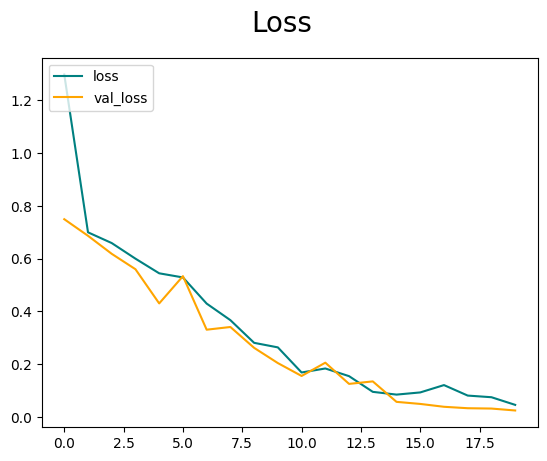

In [173]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

##if validation loss increases, could be sign of overfitting
#if losses are not decreasing, could be dataset bias

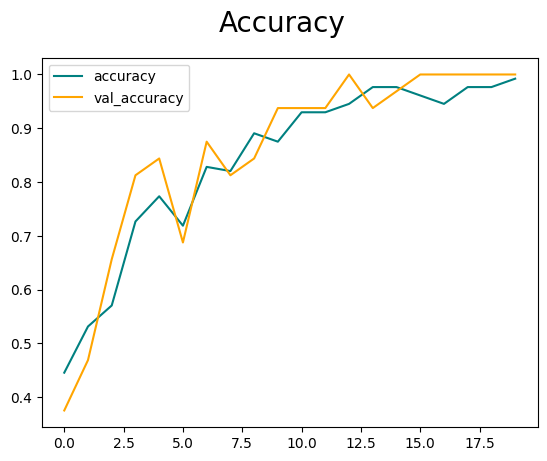

In [174]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [175]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [176]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [177]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-11-16 19:18:55.334723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-16 19:18:56.388395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 173ms/step


In [178]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# 10. Test

In [33]:
import cv2 #was already imported before

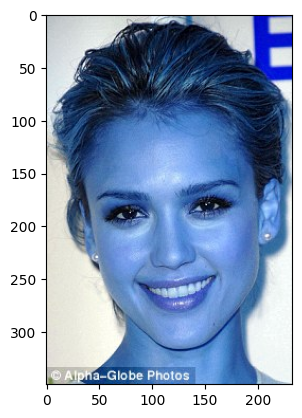

In [183]:
img = cv2.imread('normaltest.jpg')
plt.imshow(img)
plt.show()

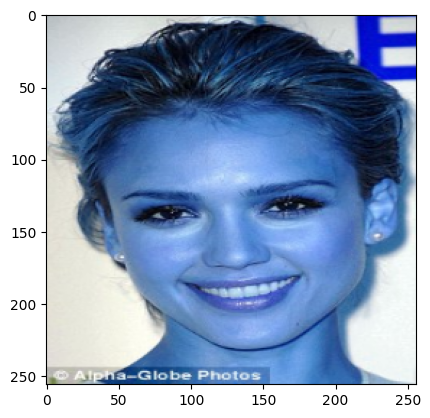

In [185]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [187]:
yhat = model.predict(np.expand_dims(resize/255, 0)) #neural network expects a batch of images:
#np.expand_dims puts the image inside a batch shaped object (1,256,256,3)

1/1 [==============================] - 0s 31ms/step


In [188]:
yhat

array([[0.93463796]], dtype=float32)

In [144]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [145]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)